<a href="https://colab.research.google.com/github/ameerfayiz/ML-notebooks/blob/main/Image_depth_estimation_hf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 53.0 MB/s eta 0:00:00


In [2]:
from transformers import DPTFeatureExtractor, DPTForDepthEstimation
import torch
import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt
import requests
import json
import random


feature_extractor = DPTFeatureExtractor.from_pretrained("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")

print("model loaded !")

def get_depth(url="https://picsum.photos/500"):
  image = Image.open(requests.get(url, stream=True).raw)
  plt.imshow(image) #.resize((image.size[0] * 2, image.size[1] * 2),resample=Image.BICUBIC))
  plt.show()
  # prepare image for the model
  inputs = feature_extractor(images=image, return_tensors="pt")

  with torch.no_grad():
      outputs = model(**inputs)
      predicted_depth = outputs.predicted_depth
  # interpolate to original size
  prediction = torch.nn.functional.interpolate(
      predicted_depth.unsqueeze(1),
      size=image.size[::-1],
      mode="bicubic",
      align_corners=False,
  )
  # visualize the prediction
  output = prediction.squeeze().cpu().numpy()
  formatted = (output * 255 / np.max(output)).astype("uint8")
  print(formatted.shape)
  depth = Image.fromarray(formatted)
  id = random.randint(10000000, 9999999999)
  image.save(f'{id}_original.jpg')
  depth.save(f'{id}_depth.jpg')
  plt.imshow(depth)
  plt.show()


/usr/local/lib/python3.8/dist-packages/transformers/models/dpt/feature_extraction_dpt.py:28: FutureWarning: The class DPTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DPTImageProcessor instead.
  warnings.warn(


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model loaded !


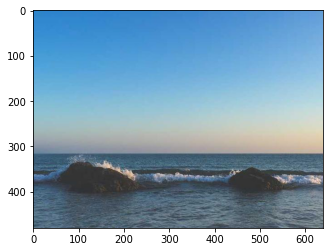

(480, 640)


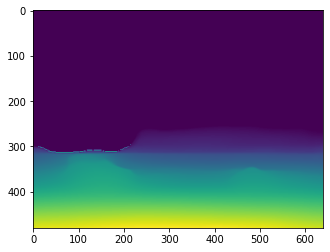

In [48]:
get_depth(url="https://picsum.photos/640/480")

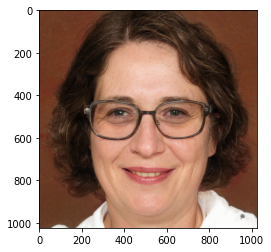

(1024, 1024)


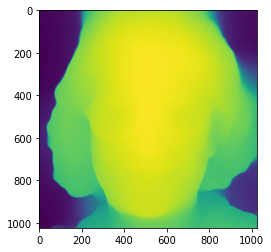

In [55]:
get_depth(url="https://thispersondoesnotexist.com/image")

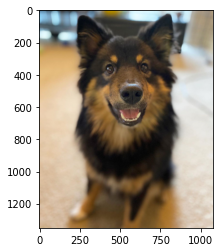

(1350, 1080)


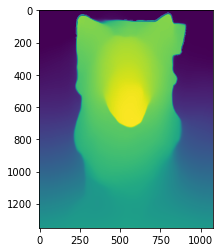

In [56]:
url = "https://dog.ceo/api/breeds/image/random"
response = requests.get(url)
# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Extract the URL of the image
    image_url = data["message"]
    get_depth(url=image_url)
else:
    print("Request failed with status code:", response.status_code)